# Camera distortion calibration
### Find chessboards  on images

In [4]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 22150 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

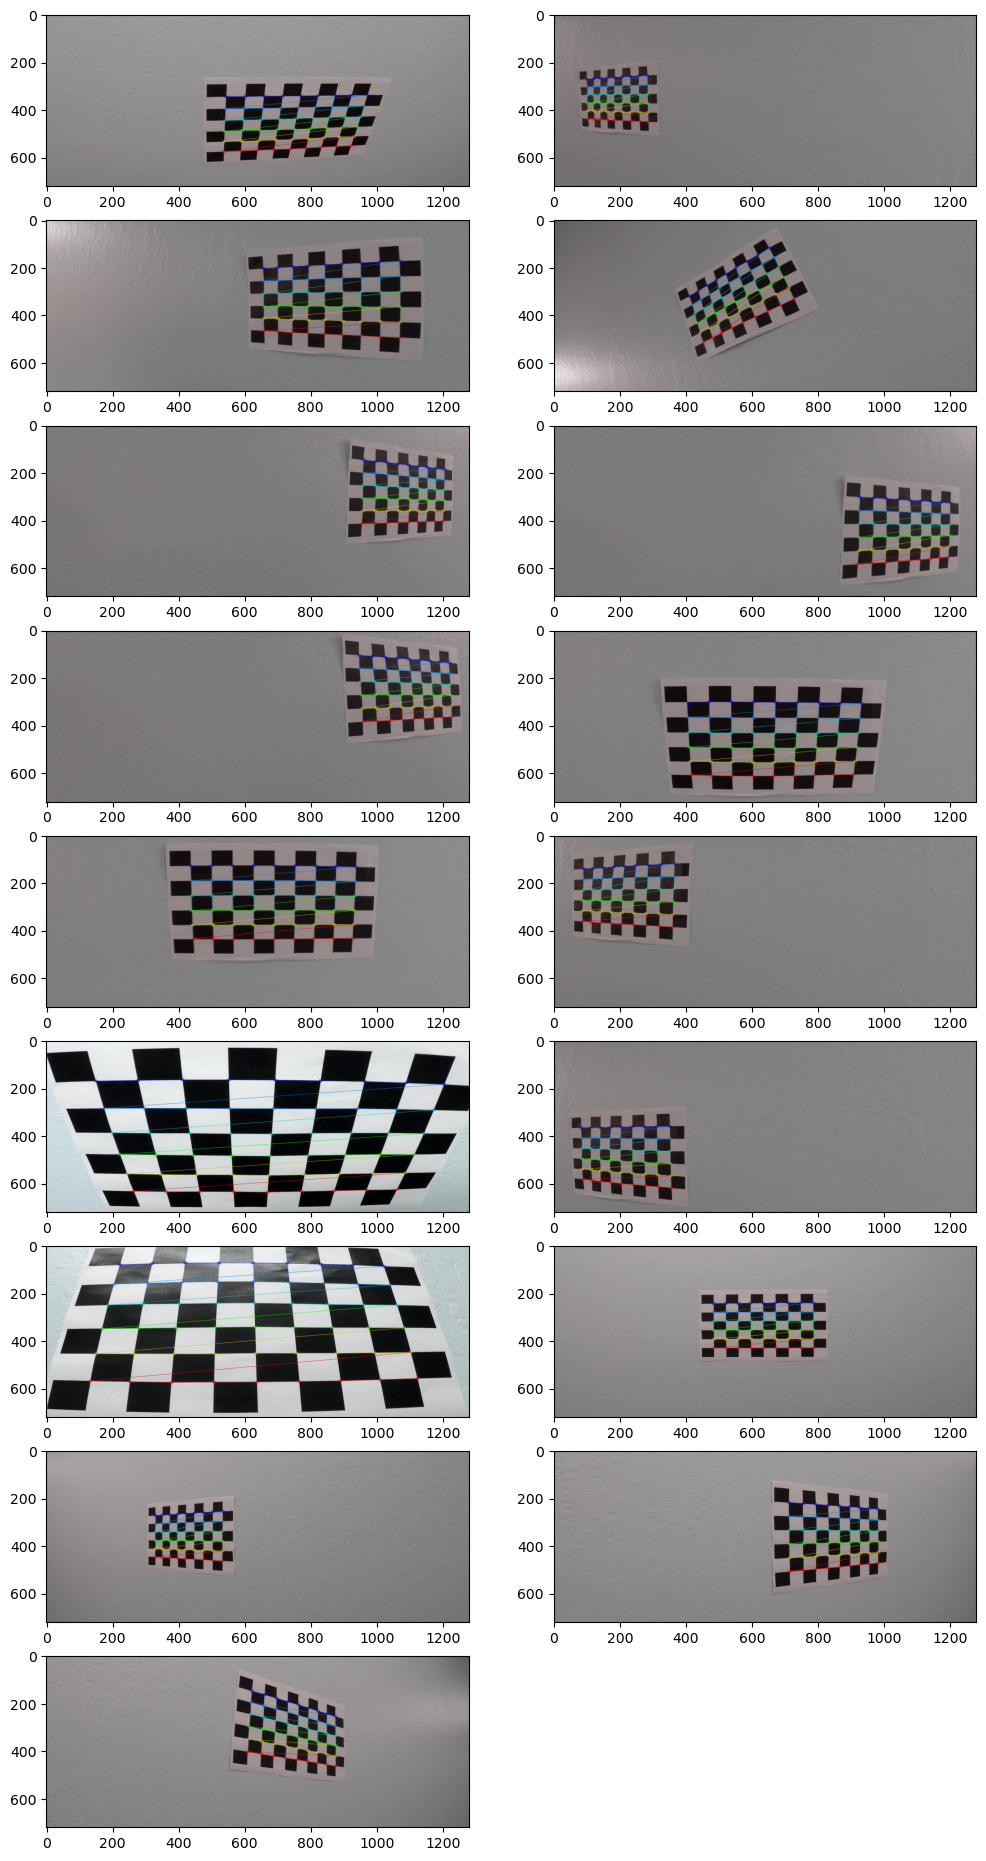

In [5]:
chessGrid = [9,6]
cal_images =  [];

imageResolution = [720,1280]

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((np.prod(chessGrid),3), np.float32)
objp[:,:2] = np.mgrid[0:chessGrid[0], 0:chessGrid[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (chessGrid[0],chessGrid[1]), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cal_images.append(img)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (chessGrid[0],chessGrid[1]), corners, ret)
        
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

displayListImages(cal_images,cols=2,figSize=[12,18])

In [7]:
## Find camera calibration parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, tuple(imageResolution), None,None)

## Distortion correction on test images

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

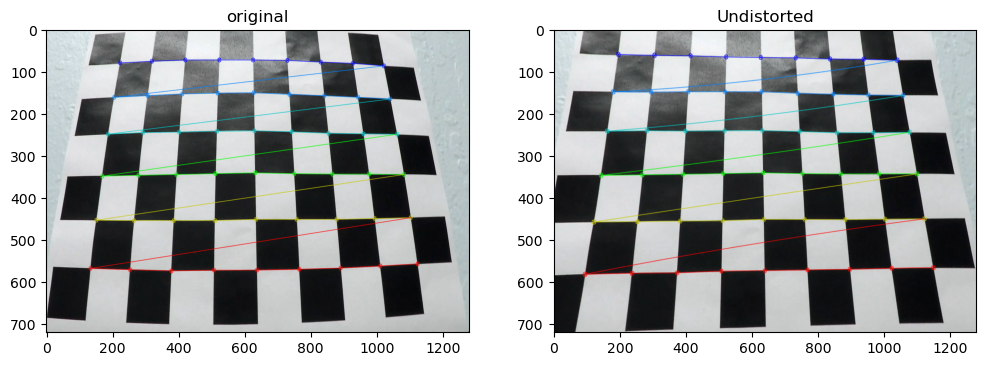

In [23]:
index = 12

original = cal_images[index]
undistorted = undistort_image(original, mtx, dist)
displayListImages([original,undistorted],cols=2,cmap='gray',figSize=[12,2],titles = ['original','Undistorted'])

## Dump data

In [4]:
pickle.dump( [ret, mtx, dist, rvecs, tvecs], open( "pickle_data/camera_calibration_params.p", "wb" ) )

***

## Images Report

In [31]:
path = './output_images/'


for i in range(len(cal_images)):
    write_name = 'cal_images_'+str(i)+'.jpg'
    cv2.imwrite(os.path.join(path , write_name), cal_images[i])
    
for i in range(len(cal_images)):
    img = undistort_image(cal_images[i], mtx, dist)
    write_name = 'undistorted_cal_images_'+str(i)+'.jpg'
    cv2.imwrite(os.path.join(path , write_name), img)